# Разработка модели

## Цели

После прохождения этой лабораторной работы вы сможете:

* Разработать модель прогнозирования

<p>В этом разделе мы разработаем несколько моделей, которые будут прогнозировать цену автомобиля с помощью переменных или характеристик. Это всего лишь оценка, но она должна дать нам объективное представление о том, сколько должна стоить машина.</p>

<p>При анализе данных мы часто используем <b>разработку моделей</b>, чтобы прогнозировать будущие наблюдения на основе имеющихся данных.</p>

<p>Модель поможет нам понять точную взаимосвязь между различными переменными и то, как эти переменные используются для прогнозирования результата.</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Линейная регрессия и множественная линейная регрессия</h2>

<h3>Линейная регрессия</h3>

<p>Один из примеров модели данных, которую мы будем использовать:</p>
<b>Простая линейная регрессия</b>

<br>
<p>Простая линейная регрессия — это метод, помогающий нам понять взаимосвязь между двумя переменными:</p>
<ul>
     <li>Предиктор/независимая переменная (X)</li>
     <li>Отклик/зависимая переменная (которую мы хотим предсказать) (Y)</li>
</ul>

<p>Результатом линейной регрессии является <b>линейная функция</b>, которая предсказывает переменную ответа (зависимую) как функцию переменной-предиктора (независимой).</p>

$$
Y: Зависимая \ переменная\\\\\\\\\\
X: Независимая \ переменная
$$

<b>Линейная функция</b>
$$
Yhat = a + b  X
$$



<ul>
     <li>"a" относится к <b>пересечению</b> линии регрессии, другими словами: значение Y, когда X равно 0</li>
     <li>"b" относится к <b>наклону</b> линии регрессии, другими словами: значение, на которое изменяется Y, когда X увеличивается на 1 единицу</li>
</ul>

<h4>Давайте загрузим модули для линейной регрессии:</h4>

In [4]:
from sklearn.linear_model import LinearRegression

<h4>Создание объекта линейной регрессии:</h4>

In [5]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Как "highway-mpg" может помочь нам предсказать цену автомобиля?</h4>

В этом примере мы хотим посмотреть, как "highway-mpg" может помочь нам предсказать цену автомобиля. Используя простую линейную регрессию, мы создадим линейную функцию с «highway-mpg» в качестве переменной-предиктора и «price» в качестве переменной-ответа.

In [6]:
X = df[['highway-mpg']]
Y = df['price']

Соответствуйте линейной модели используя highway-mpg:

In [7]:
lm.fit(X,Y)

LinearRegression()

Мы можем вывести прогноз:

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Каково значение точки пересечения (a)?</h4>

In [9]:
lm.intercept_

38423.3058581574

<h4>Каково значение наклона (b)?</h4>

In [10]:
lm.coef_

array([-821.73337832])

<h3>Какую окончательную оценочную линейную модель мы получим?</h3>

Как мы видели выше, мы должны получить окончательную линейную модель со структурой:

$$
Yhat = a + b  X
$$



Подставляя фактические значения, мы получаем:

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

<h4>Создайте объект линейной регрессии с именем «lm1» </h4>

In [11]:
lm1 = LinearRegression()
lm1

LinearRegression()

<h4>Обучите модель, используя «engine-size» в качестве независимой переменной и «price» в качестве зависимой переменной</h4>

In [12]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

<h4>Найдите наклон и точку пересечения модели</h4>

In [13]:
# Наклон 
lm1.coef_

array([[166.86001569]])

In [14]:
# Пересечение
lm1.intercept_

array([-7963.33890628])

<h4>Каково уравнение предсказанной линии?</h4>
<h5>Вы можете использовать 'x' и 'Yhat' или «размер двигателя» или «цена»</h5>

In [15]:
Yhat = -7963.34 + 166.86 * X

In [16]:
# Price = -7963.34 + 166.86 * engine_size

<h3>Множественная линейная регрессия</h3>

<p>Что, если мы хотим предсказать цену автомобиля, используя более одной переменной?</p>

<p>Если мы хотим использовать в нашей модели больше переменных для прогнозирования цены автомобиля, мы можем использовать <b>множественную линейную регрессию</b>.
Множественная линейная регрессия очень похожа на простую линейную регрессию, но этот метод используется для объяснения взаимосвязи между одной переменной непрерывного отклика (зависимой) и <b>двумя или более</b> предикторными (независимыми) переменными.
Большинство реальных регрессионных моделей включают несколько предикторов. Мы проиллюстрируем структуру с помощью четырех переменных-предикторов, но эти результаты можно обобщить на любое целое число:</p>

$$
Y: Зависимая \ переменная\\\\\\\\\\
X\_1: Независимая \ переменная \ 1\\\\
X\_2: Независимая \ переменная \ 2\\\\
X\_3: Независимая \ переменная \ 3\\\\
X\_4: Независимая \ переменная \ 4\\\\
$$



$$
a: Пересечение\\\\\\\\\\
b\_1: Наклон \ переменной \ 1\\\\
b\_2: Наклон \ переменной \ 2\\\\
b\_3: Наклон \ переменной \ 3\\\\
b\_4: Наклон \ переменной \ 4\\\\
$$



Структура уравнения множественной линейной регрессии:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$



<p>Из предыдущего раздела мы знаем, что другими хорошими предикторами цены могут быть:</p>
<ul>
     <li>Мощность</li>
     <li>Снаряженная масса</li>
     <li>Размер двигателя</li>
     <li>Мили на галлон по шоссе</li>
</ul>
<h4>Давайте разработаем модель, используя эти переменные в качестве предикторов.</h4>

In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Соответствуйте линейной модели с помощью четырех вышеупомянутых переменных.

In [18]:
lm.fit(Z, df['price'])

LinearRegression()

<h4>Каково значение точки пересечения (a)?</h4>

In [19]:
lm.intercept_

-15806.624626329194

<h4>Каково значение наклона (b1, b2, b3, b4)?</h4>

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<h4>Какова окончательная оценочная линейная модель, которую мы получаем?</h4>

Как мы видели выше, у нас должна получиться итоговая линейная функция со структурой:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3b\_4 X_4
$$

Какую линейную функцию мы получим в этом примере?

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

<h4>Создайте и обучите модель множественной линейной регрессии «lm2», где переменной ответа является «цена», а переменной-предиктором являются «нормализованные потери» и «шоссе-миль на галлон».</h4?

In [22]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

<h4>Найдите коэффициент модели</h4>

In [24]:
lm2.coef_

array([   1.49789586, -820.45434016])

<h2>2. Оценка модели с помощью визуализации</h2>

Теперь, когда мы разработали несколько моделей, как нам оценить наши модели и выбрать лучшую? Один из способов сделать это — использовать визуализацию.

In [25]:
# импортировать пакет визуализации: seaborn
import seaborn as sns
%matplotlib inline 

<h3>График регрессии</h3>

<p>Когда дело доходит до простой линейной регрессии, отличным способом визуализировать соответствие нашей модели является использование <b>графиков регрессии</b>.</p>

<p>На этом графике будет отображаться комбинация разбросанных точек данных (<b>диаграмма рассеяния</b>), а также подобранная линия <b>линейной регрессии</b>, проходящая через данные. Это даст нам разумную оценку взаимосвязи между двумя переменными, силу корреляции, а также направление (положительная или отрицательная корреляция).</p>

Давайте визуализируем **шоссе-миль на галлон** как потенциальную предикторную переменную **цены**:

(0.0, 48172.45423712931)

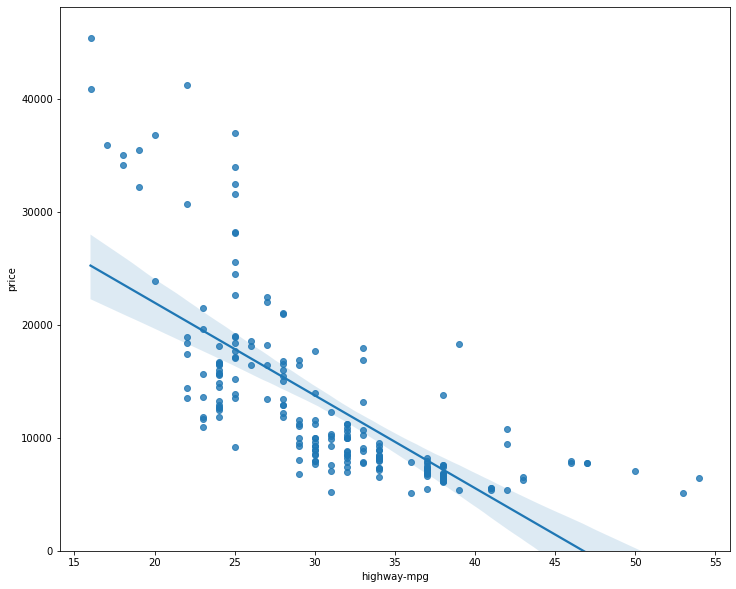

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>Из этого графика видно, что цена отрицательно коррелирует с расходом на галлон по шоссе, поскольку наклон регрессии отрицательный.

При просмотре графика регрессии следует помнить одну вещь: обращайте внимание на то, насколько разбросаны точки данных вокруг линии регрессии. Это даст вам хорошее представление о дисперсии данных и о том, будет ли линейная модель лучше всего подходить или нет. Если данные слишком далеко от линии, эта линейная модель может быть не лучшей моделью для этих данных.

Давайте сравним этот график с графиком регрессии "пиковой скорости вращения".</p>

(0.0, 47414.1)

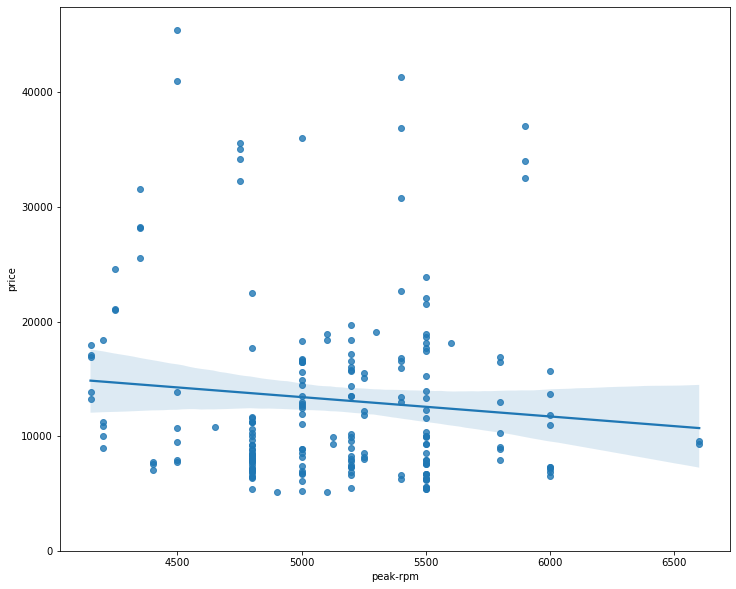

In [27]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Сравнивая график регрессии «пиковое число оборотов в минуту» и «шоссе-миль на галлон», мы видим, что точки для «шоссе-миль на галлон» намного ближе к сгенерированной линии и в среднем уменьшаются. Точки для «пиковых оборотов в минуту» больше разбросаны по прогнозируемой линии, и гораздо сложнее определить, уменьшаются или увеличиваются точки по мере увеличения «пиковых оборотов».

<h4>Учитывая приведенные выше графики регрессии, какая переменная сильнее коррелируют с «ценой»?</h4>
    <h4>Используйте метод «.corr()», чтобы проверить свой ответ</h4>

In [29]:
# Переменная «highway-mpg» имеет более сильную корреляцию с «ценой», 
# она составляет приблизительно -0,704692 по сравнению с «peak-rpm», которая составляет приблизительно -0,101616. 


df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Остаточный график</h3>

<p>Хорошим способом визуализировать дисперсию данных является использование остаточного графика.</p>

<p>Что такое <b>остаток</b>?</p>

<p>Разница между наблюдаемым значением (y) и прогнозируемым значением (Yhat) называется остатком (e). Когда мы смотрим на график регрессии, остаток — это расстояние от точки данных до подобранной линии регрессии.</p>

<p>Так что же такое <b>остаточный график</b>?</p>

<p>Остаточный график – это график, отображающий невязки по вертикальной оси Y и независимую переменную по горизонтальной оси X.</p>

<p>На что мы обращаем внимание, когда смотрим на остаточный участок?</p>

<p>Мы смотрим на разброс остатков:</p>

<p>- Если точки на остаточном графике <b>случайно разбросаны по оси x</b>, то для данных подходит <b>линейная модель</b>.

Почему это? Случайно распределенные остатки означают, что дисперсия постоянна, и поэтому линейная модель хорошо подходит для этих данных.</p>

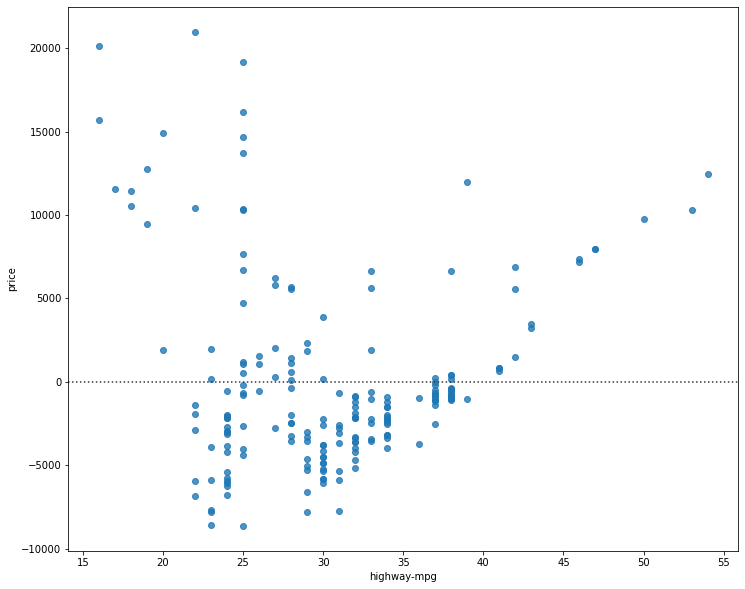

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<i>О чем говорит нам этот график?</i>

<p>Из этого графика остатков видно, что остатки не распределены случайным образом по оси X, что наводит нас на мысль, что, возможно, для этих данных больше подходит нелинейная модель.</p>

<h3>Множественная линейная регрессия</h3>

<p>Как визуализировать модель множественной линейной регрессии? Это становится немного сложнее, потому что вы не можете визуализировать это с помощью регрессии или остаточного графика.</p>

<p>Один из способов оценить соответствие модели – посмотреть на <b>график распределения</b>. Мы можем посмотреть на распределение подобранных значений, полученных в результате модели, и сравнить его с распределением фактических значений.</p>

Сначала сделаем прогноз:

In [32]:
Y_hat = lm.predict(Z)

/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/volodymyrchubay/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


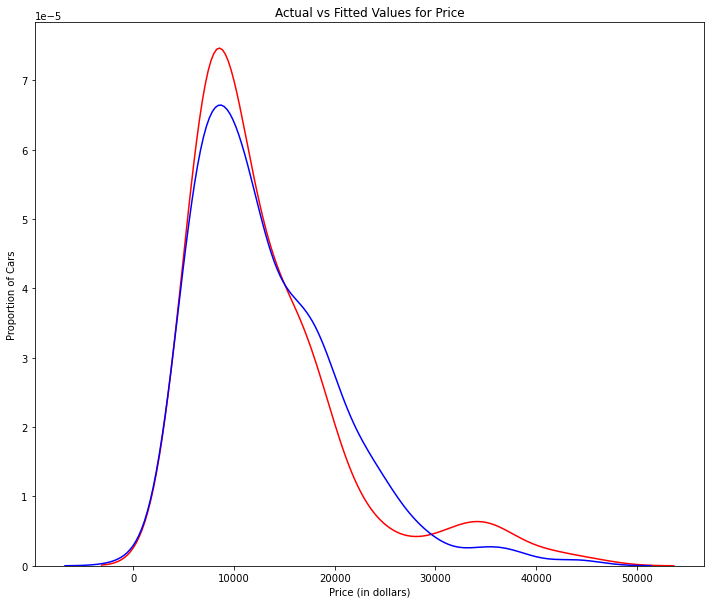

In [35]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Мы видим, что подобранные значения достаточно близки к фактическим значениям, поскольку два распределения немного перекрываются. Тем не менее, определенно есть место для улучшения.

<h2>3. Полиномиальная регрессия и конвейеры</h2>

<p><b>Полиномиальная регрессия</b> — это частный случай общей модели линейной регрессии или моделей множественной линейной регрессии.</p>
<p>Мы получаем нелинейные отношения, возводя в квадрат или устанавливая члены более высокого порядка переменных-предикторов.</p>

<p>Существуют разные порядки полиномиальной регрессии:</p>

<center><b>Квадратичный - 2-й порядок</b></center>

$$
Yhat = a + b_1 X +b_2 X^2\\\\\\\\\\ 
$$

<center><b>Кубический - 3-й порядок</b></center>

$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Более высокого порядка</b>:</center>

$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$



Ранее мы видели, что линейная модель не дает наилучшего соответствия при использовании «highway-mpg» в качестве переменной-предиктора. Давайте посмотрим, можем ли мы вместо этого попробовать подогнать к данным полиномиальную модель.

Мы будем использовать следующую функцию для построения графика данных:

In [36]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Укажем переменные:

In [37]:
x = df['highway-mpg']
y = df['price']

Подгоним полином с помощью функции <b>polyfit</b>, а затем воспользуемся функцией <b>poly1d</b> для отображения полиномиальной функции.

In [38]:
# Здесь мы используем многочлен 3-го порядка (кубический)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Построим график функции:

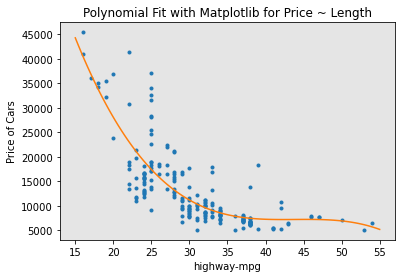

In [39]:
PlotPolly(p, x, y, 'highway-mpg')

In [40]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Мы уже можем видеть из графика, что эта полиномиальная модель работает лучше, чем линейная модель. Это связано с тем, что сгенерированная полиномиальная функция «попадает» в большее количество точек данных.

<h4>Создайте полиномиальную модель 11-го порядка с переменными x и y, указанными выше</h4>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


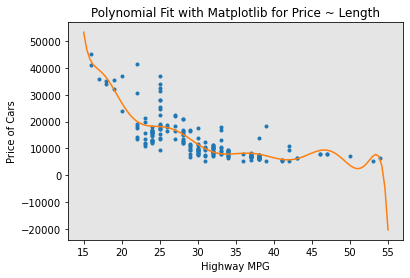

In [41]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

Аналитическое выражение для многомерной полиномиальной функции усложняется. Например, выражение для многочлена второго порядка (степень = 2) с двумя переменными имеет вид:

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$

Мы можем выполнить полиномиальное преобразование для нескольких функций. Сначала мы импортируем модуль:

In [42]:
from sklearn.preprocessing import PolynomialFeatures

Мы создаем объект <b>PolynomialFeatures</b> степени 2:

In [43]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [44]:
Z_pr=pr.fit_transform(Z)

В исходных данных 201 образец и 4 признака.

In [45]:
Z.shape

(201, 4)

После преобразования остается 201 образец и 15 признаков.

In [46]:
Z_pr.shape

(201, 15)

<h2>Конвейер</h2>

<p>Конвейеры данных упрощают этапы обработки данных. Мы используем модуль <b>Pipeline</b> для создания конвейера. Мы также используем <b>StandardScaler</b> в качестве шага в нашем конвейере.</p>

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Мы создаем конвейер, создавая список кортежей, включая имя модели или оценщика и соответствующий ему конструктор.

In [48]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Мы вводим список в качестве аргумента конструктору конвейера:

In [49]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Во-первых, мы преобразуем тип данных Z в тип float, чтобы избежать предупреждений о преобразовании, которые могут появиться в результате того, что StandardScaler принимает входные данные с плавающей запятой.

Затем мы можем нормализовать данные, выполнить преобразование и одновременно подобрать модель.

In [50]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Точно так же мы можем нормализовать данные, выполнить преобразование и одновременно произвести прогноз.

In [51]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h4>Создайте конвейер, который стандартизирует данные, затем создайте прогноз, используя модель линейной регрессии, используя функции Z и цель y.</h4>

In [53]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>4. Меры для оценки в выборке</h2>

<p>При оценке наших моделей мы хотим не только визуализировать результаты, но и количественно оценить точность модели.</p>

<p>Два очень важных показателя, которые часто используются в статистике для определения точности модели:</p>
<ul>
     <li><b>R^2 / R-квадрат</b></li>
     <li><b>Среднеквадратическая ошибка (MSE)</b></li>
</ul>

<b>R-квадрат</b>

<p>Квадрат R, также известный как коэффициент детерминации, представляет собой показатель, показывающий, насколько данные близки к подобранной линии регрессии.</p>

<p>Значение R-квадрата – это процент изменения переменной ответа (y), которое объясняется линейной моделью.</p>

<b>Среднеквадратическая ошибка (MSE)</b>

<p>Среднеквадратическая ошибка измеряет среднее значение квадратов ошибок. То есть разница между фактическим значением (y) и оценочным значением (ŷ).</p>

<h3>Модель 1: простая линейная регрессия</h3>

Рассчитаем R^2:

In [54]:
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Можно сказать, что ~49,659% вариации цены объясняется этой простой линейной моделью «horsepower_fit».

Рассчитаем среднеквадратическую ошибку (MSE):

Мы можем предсказать результат, т. е. «yhat», используя метод прогнозирования, где X — входная переменная:

In [56]:
Yhat=lm.predict(X)
print('Вывод первых четырех прогнозируемых значений:: ', Yhat[0:4])

Вывод первых четырех прогнозируемых значений::  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Импортируем функцию <b>mean_squared_error</b> из модуля <b>metrics</b>:

In [57]:
from sklearn.metrics import mean_squared_error

Мы можем сравнить прогнозируемые результаты с фактическими результатами:

In [59]:
mse = mean_squared_error(df['price'], Yhat)
print('Среднеквадратическая ошибка цены и прогнозируемого значения равна: ', mse)

Среднеквадратическая ошибка цены и прогнозируемого значения равна:  31635042.944639888


<h3>Модель 2: множественная линейная регрессия</h3>

Let's calculate the R^2:

In [60]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

We produce a prediction:

In [61]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:

In [62]:
print('Среднеквадратическая ошибка цены и прогнозируемого значения с использованием мультифита равна: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

Среднеквадратическая ошибка цены и прогнозируемого значения с использованием мультифита равна:  11980366.87072649


<h3>Модель 3: полиномиальная аппроксимация</h3>

Let's calculate the R^2.

Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.

In [64]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:

In [65]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

<h3>Среднеквадратическая ошибка (MSE)</h3>

We can also calculate the MSE:

In [67]:
mean_squared_error(df['price'], p(x))

20474146.426361226

<h2>5. Прогнозирование и принятие решений</h2>
<h3>Прогноз</h3>

<p>В предыдущем разделе мы обучили модель с помощью метода <b>fit</b>. Теперь мы будем использовать метод <b>predict</b> для создания прогноза. Давайте импортируем <b>pyplot</b> для построения графика; мы также будем использовать некоторые функции из numpy.</p>

In [68]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Создайте новый вход:

In [69]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:

In [70]:
lm.fit(X, Y)
lm

LinearRegression()

Сделайте прогноз:

In [71]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Мы можем визуализировать данные:

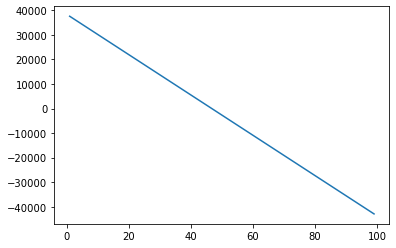

In [73]:
plt.plot(new_input, yhat)
plt.show()

<h3>Принятие решений: определение подходящей модели</h3>

<p>Теперь, когда мы визуализировали различные модели и сгенерировали значения R-квадрата и MSE для подгонки, как определить, что модель подходит?
<ul>
    <li><i>Что такое хорошее значение R-квадрата?</i></li>
</ul>
</p>

<p>При сравнении моделей <b>модель с более высоким значением R-квадрата лучше подходит</b> для данных.
<ul>
    <li><i>Что такое хорошая MSE?</i></li>
</ul>
</p>

<p>При сравнении моделей <b>модель с наименьшим значением MSE лучше подходит</b> для данных.</p>

<h4>Давайте посмотрим на значения для разных моделей.</h4>
<p>Простая линейная регрессия: использование Highway-mpg в качестве предиктора цены.
<ul>
    <li>R-квадрат: 0,49659118843391759</li>
    <li>MSE: 3,16 x 10^7</li>
</ul>
</p>

<p>Множественная линейная регрессия: использование лошадиных сил, снаряженной массы, объема двигателя и расхода топлива на галлон в качестве предикторов цены.
<ul>
    <li>R-квадрат: 0,80896354913783497</li>
    <li>MSE: 1,2 x 10^7</li>
</ul>
</p>

<p>Полиномиальная аппроксимация: использование Highway-mpg в качестве предиктора цены.
<ul>
    <li>R-квадрат: 0,6741946663906514</li>
    <li>MSE: 2,05 x 10^7</li>
</ul>
</p>

<h3>Модель простой линейной регрессии (SLR) и модель множественной линейной регрессии (MLR)</h3>

<p>Как правило, чем больше у вас переменных, тем лучше прогнозирует ваша модель, но это не всегда так. Иногда у вас может быть недостаточно данных, вы можете столкнуться с числовыми проблемами или многие переменные могут быть бесполезными и даже действовать как шум. Поэтому всегда следует проверять MSE и R^2.</p>

<p>Чтобы сравнить результаты моделей MLR и SLR, мы рассматриваем комбинацию R-квадрата и MSE, чтобы сделать наилучший вывод о соответствии модели.
<ul>
     <li><b>MSE</b>: MSE SLR составляет 3,16x10^7, а MLR имеет MSE 1,2x10^7. MSE MLR намного меньше.</li>
     <li><b>R-квадрат</b>. В этом случае мы также видим большую разницу между R-квадратом SLR и R-квадратом MLR. R-квадрат для SLR (~0,497) очень мал по сравнению с R-квадратом для MLR (~0,809).</li>
</ul>
</p>

Этот R-квадрат в сочетании с MSE показывает, что MLR кажется лучшей моделью, подходящей в этом случае по сравнению с SLR.

<h3>Простая линейная модель (SLR) и полиномиальная аппроксимация</h3>

<ul>
     <li><b>MSE</b>: мы видим, что полиномиальная подгонка снизила MSE, поскольку эта MSE меньше, чем у SLR.</li>
     <li><b>R-квадрат</b>: R-квадрат для полиномиальной аппроксимации больше, чем R-квадрат для SLR, поэтому полиномиальная аппроксимация также значительно увеличила R-квадрат.</li>
</ul>
<p>Поскольку полиномиальная аппроксимация привела к более низкому MSE и более высокому R-квадрату, мы можем сделать вывод, что эта модель лучше подходит, чем простая линейная регрессия для прогнозирования "цены" с "highway-mpg" в качестве предикторной переменной. </p>

<h3>Множественная линейная регрессия (MLR) и полиномиальная аппроксимация</h3>

<ul>
     <li><b>MSE</b>: MSE для MLR меньше, чем MSE для полиномиальной аппроксимации.</li>
     <li><b>R-квадрат</b>: R-квадрат для MLR также намного больше, чем для полиномиальной аппроксимации.</li>
</ul>

<h2>Вывод</h2>

<p>Сравнивая эти три модели, мы приходим к выводу, что <b>модель MLR является лучшей моделью</b> для прогнозирования цены на основе нашего набора данных. Этот результат имеет смысл, поскольку у нас всего 27 переменных, и мы знаем, что более одной из этих переменных являются потенциальными предикторами окончательной цены автомобиля.</p>